In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [22]:
!pip install scikit-learn
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [23]:
data=pd.read_csv('RAIPUR_CORONAVIRUS_CASES.CSV',sep=',')

In [24]:
data

,ID,Total_CASES
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1
...,...,...
128,129,27096
129,130,29283
130,131,31649
131,132,34173


In [25]:
data=data[['ID','Total_CASES']]

In [26]:
data

,ID,Total_CASES
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1
...,...,...
128,129,27096
129,130,29283
130,131,31649
131,132,34173


In [27]:
data.head(5)

,ID,Total_CASES
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1


In [28]:
data.tail(5)

,ID,Total_CASES
128,129,27096
129,130,29283
130,131,31649
131,132,34173
132,133,36832


In [29]:
#changing format (array)

x=np.array(data['ID']).reshape(-1,1)
y=np.array(data['Total_CASES']).reshape(-1,1)

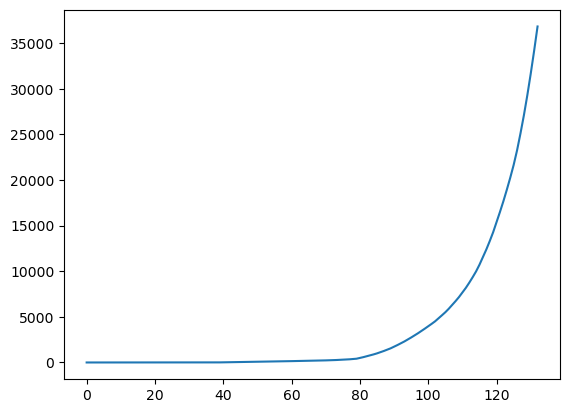

In [30]:
#plotting graph

plt.plot(y,'-')
plt.show()

In [31]:
#polynomial regression

Poly=PolynomialFeatures(degree=6)
x=Poly.fit_transform(x)

In [32]:
x

array([[1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 2.00000000e+00, 4.00000000e+00, 8.00000000e+00,
        1.60000000e+01, 3.20000000e+01, 6.40000000e+01],
       [1.00000000e+00, 3.00000000e+00, 9.00000000e+00, 2.70000000e+01,
        8.10000000e+01, 2.43000000e+02, 7.29000000e+02],
       [1.00000000e+00, 4.00000000e+00, 1.60000000e+01, 6.40000000e+01,
        2.56000000e+02, 1.02400000e+03, 4.09600000e+03],
       [1.00000000e+00, 5.00000000e+00, 2.50000000e+01, 1.25000000e+02,
        6.25000000e+02, 3.12500000e+03, 1.56250000e+04],
       [1.00000000e+00, 6.00000000e+00, 3.60000000e+01, 2.16000000e+02,
        1.29600000e+03, 7.77600000e+03, 4.66560000e+04],
       [1.00000000e+00, 7.00000000e+00, 4.90000000e+01, 3.43000000e+02,
        2.40100000e+03, 1.68070000e+04, 1.17649000e+05],
       [1.00000000e+00, 8.00000000e+00, 6.40000000e+01, 5.12000000e+02,
        4.09600000e+03, 3

In [33]:
# training the data and preparing the model

model=linear_model.LinearRegression()

In [35]:
model.fit(x,y)
accuracy=model.score(x,y)

In [36]:
print(f'Accuracy:{round(accuracy*100,3)}%')

Accuracy:99.941%


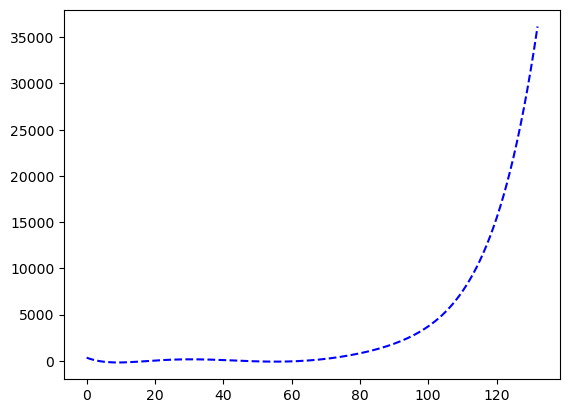

In [37]:
# plotting the test -model data

y0=model.predict(x)
plt.plot(y0,'--b')
plt.show()

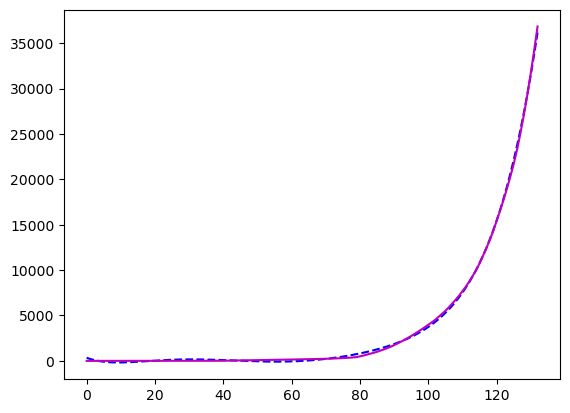

In [39]:
#compare model data with actual data

plt.plot(y0,'--b') #y0 is predicted data 
plt.plot(y,'-m') #y is real data
plt.show()

In [40]:
#to find the number of cases for the (n) number of days // prediction

In [41]:
days = 3

In [42]:
print(f'Prediction - Case after {days} days = ', end=' ')

Prediction - Case after 3 days =  

In [43]:
print(round(int(model.predict(Poly.fit_transform([[130 + days]])))),'lakhs')

36163 lakhs


# so in 133th day the precise cases are 36832 and we are gettinh 36163, difference being 669

In [45]:
x1=np.array(list(range(1,137+days))).reshape(-1,1)
y1=model.predict(Poly.fit_transform(x1))

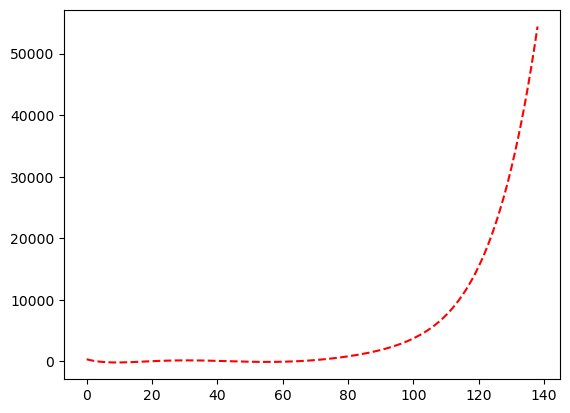

In [46]:
plt.plot(y1,'--r')